In [1]:
#Imports 
import numpy as np #Represent ndarrays a.k.a. tensors
import matplotlib.pyplot as plt #For plotting
np.random.seed(0) #For repeatability of the experiment
import pickle #To read data for this experiment

#Setup
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [25]:
#Read data

X = pickle.load(open('dataX.pickle','rb'),encoding='latin1')
y = pickle.load(open('dataY.pickle','rb'),encoding='latin1')
print(X)

[[ -0.00000000e+00   0.00000000e+00]
 [  3.67179267e-03   9.41001295e-03]
 [  1.15442678e-03   2.01690089e-02]
 [ -4.49181113e-04   3.02997010e-02]
 [  1.17429195e-02   3.86599317e-02]
 [  5.53814609e-03   5.02004887e-02]
 [ -1.48030440e-03   6.05879797e-02]
 [  9.53440515e-04   7.07006421e-02]
 [  3.60183955e-02   7.23368586e-02]
 [  2.96064842e-02   8.59530041e-02]
 [  3.72133143e-02   9.39053233e-02]
 [  6.81234983e-02   8.77773775e-02]
 [  3.11007523e-02   1.17154264e-01]
 [  4.85990280e-02   1.21988823e-01]
 [  6.63884712e-02   1.24862045e-01]
 [  8.86426142e-02   1.22879323e-01]
 [  9.62609198e-02   1.29821489e-01]
 [  1.01095668e-01   1.38803649e-01]
 [  1.19195952e-01   1.37295945e-01]
 [  1.30287215e-01   1.40919189e-01]
 [  1.24524818e-01   1.59077754e-01]
 [  1.34348898e-01   1.64151705e-01]
 [  1.79953080e-01   1.30382534e-01]
 [  1.58549095e-01   1.69812452e-01]
 [  1.63145878e-01   1.79312397e-01]
 [  2.05061102e-01   1.47373497e-01]
 [  2.23644480e-01   1.37679702e-01]
 

2
3


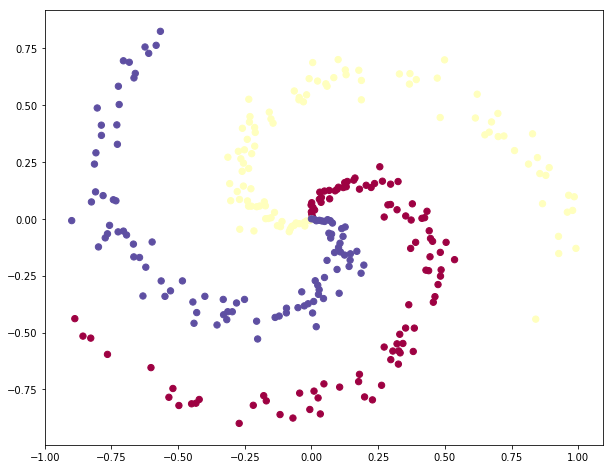

In [20]:
D = X.shape[1] #Number of features
K = max(y)+1 #Number of classes assuming class index starts from 0
print(D)
print(K)
#Plot the data
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

In [27]:

# Start with an initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))
print(W)
print(b)
# Initial values from hyperparameter
reg = 1e-0 # regularization strength

[[ 0.00950088 -0.00151357 -0.00103219]
 [ 0.00410599  0.00144044  0.01454274]]
[[ 0.  0.  0.]]


In [29]:
#For simplicity we will take the batch size to be the same as number of examples
num_examples = X.shape[0]

#Initial value for the Gradient Descent Parameter
step_size = 1e-0 #Also called learning rate

In [34]:
# gradient descent loop
for i in range(200):
  
    # evaluate class scores, [N x K]
    scores = np.dot(X, W) + b 
      
    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
    l=argma

    # compute the loss: average cross-entropy loss and regularization
    corect_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(corect_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W)
    loss = data_loss + reg_loss
    if i % 10 == 0:
        print("iteration %d: loss %f" % (i, loss))
  
    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples
  
    # backpropate the gradient to the parameters (W,b)
    dW = np.dot(X.T, dscores)
    db = np.sum(dscores, axis=0, keepdims=True)
  
    dW += reg*W # regularization gradient
  
    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db

iteration 0: loss 1.098603
iteration 10: loss 0.908351
iteration 20: loss 0.837579
iteration 30: loss 0.805462
iteration 40: loss 0.788747
iteration 50: loss 0.779216
iteration 60: loss 0.773430
iteration 70: loss 0.769752
iteration 80: loss 0.767335
iteration 90: loss 0.765704
iteration 100: loss 0.764581
iteration 110: loss 0.763795
iteration 120: loss 0.763237
iteration 130: loss 0.762838
iteration 140: loss 0.762549
iteration 150: loss 0.762338
iteration 160: loss 0.762184
iteration 170: loss 0.762070
iteration 180: loss 0.761986
iteration 190: loss 0.761924


In [54]:

# Post-training: evaluate test set accuracy

#For simplicity, we will use training data as proxy for test. Do not do this.
X_test = X
y_test = y

scores = np.dot(X_test, W) + b
predicted_class = np.argmax(scores, axis=1)
print('test accuracy: %.2f' % (np.mean(predicted_class == y_test)))

test accuracy: 0.51


(-1.8994431104458032, 1.8205568895542001)

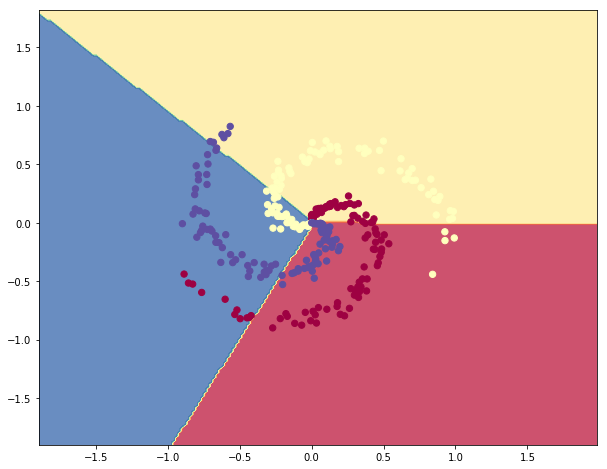

In [55]:
# Post training: plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')